# Gagner de la modularité : les objets Gate

## Introduction

Lors des précédentes séances, nous avons vu comment :

- construire et mesurer un circuit quantique ;
- implémenter une méthode permettant de rajouter une porte quantique à un circuit ;
- implémenter la transformée de Fourier quantique pour un nombre donné de qubits ;
- comment implémenter l'inverse d'une opération quantique dont la transformée de Fourier quantique ;
- comment implémenter une estimation de phase.

Dans le cadre de séance, nous verrons :

- comment gagner de la modularité grâce aux objets Gate ;
- une mise en pratique d'utilisation de ces objets Gate.

Pour cela, nous diviserons la séance en :

- une présentation des objets Gate ;
- des exercices d'appropriation de ces objets ;
- une démonstration du gain de modularité avec l'exemple d'un *do_swaps* contrôlé.

A la fin du cours, vous devrez téléverser sur le Moodle votre notebook que vous aurez pris le soin de renommer sous la forme *24-11-2020 Nom Prénom*.

### Nom et prénom


Commençons par inscrire votre nom et prénom en tant qu'objet string nom_prenom. Nous utiliserons comme convention :

- Un _ séparera le nom et le prénom.

Ainsi :

- Pour Jean Philippe Arias Zapata (le tiret est une longue histoire...), nom_prenom = 'Arias Zapata_Jean Philippe ; 
- Pour Jean-Pierre Pernault, nom_prenom = 'Pernault_Jean-Pierre'.

In [1]:
nom_prenom = "Timothé Presles"

## Une première approche des objets Gate

Lors de nos différentes séances, nous avions vu comment représenter dans Qiskit les éléments fondamentaux utiles à l'implémentation d'algorithmes quantique. Dans ce cadre, nous avons vu que les opérations quantiques élémentaires se résumaient en des instructions données directement pour des objets QuantumCircuit.

Nous allons voir un type d'objet différent, les objets Gate, qui présentent l'avantage d'être plus modulables et se rapprochent de l'idée qu'on se fait d'une porte quantique.


### Quelques objets Gate élémentaires

Les objets Gate jouent le rôle des portes quantiques. Tout comme les instructions qui nécessitaient des instructions élémentaires déjà implémentées (mettre une porte NOT avec la commande *circuit.x()*, etc.), nous aurons besoin d'un certain nombre d'objets Gate déjà implémentés par Qiskit afin de pouvoir définir les nôtres. 

Nous allons faire un rapide tour des objets Gate qui nous serons utiles dans ce Jupyter Notebook. Ce seront les objets Gate associés aux portes NOT, Hadamard, CNOT et CU1 **(CP dans la nouvelle version de Qiskit)**. Si jamais vous souhaitez utiliser des portes différentes, je vous conseille de jeter un coup d'oeil à la documentation associée.

Commençons par la **porte NOT** représentée par l'objet XGate.

In [2]:
from qiskit import QuantumRegister, QuantumCircuit

q = QuantumRegister(1)
circ = QuantumCircuit(q)

Nous avons un circuit quantique sur lequel nous souhaitons appliquer une porte NOT. La syntaxe à utiliser est celle-ci pour bien avoir une porte NOT implémentée :

In [3]:
from qiskit.circuit.library.standard_gates import XGate
# from qiskit.extensions.standard.x import XGate

circ.append(XGate(), q)

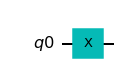

In [4]:
circ.draw(output='mpl')

*Remarque : le deuxième argument du append doit :*

- *soit être un registre quantique ;*
- *soit être une liste d'objets Qubit ;* 
- *soit être une liste des indices des qubits du circuit.*

*Cela ne peut pas être un objet Qubit seul. Ainsi si vous voulez faire agir votre porte spécifiquement sur q[0], vous devrez donner en argument soit [q[0]], soit [0].*

Après la porte NOT, vous allez maintenant appliquer une **porte d'Hadamard** sur ce circuit (je vous laisse deviner la syntaxe).

In [5]:
# from qiskit.extensions.standard.h import HGate
from qiskit.circuit.library.standard_gates import HGate

circ.append(HGate(), q)

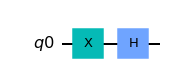

In [6]:
circ.draw(output='mpl')

Nous allons maintenant faire de même pour la **porte CNOT** :

In [7]:
# from qiskit.extensions.standard.x import CnotGate
from qiskit.circuit.library.standard_gates import CXGate

circ.add_register(QuantumRegister(1))

circ.append(CXGate(), circ.qubits[0:2])

In [8]:
circ.qubits

[Qubit(QuantumRegister(1, 'q0'), 0), Qubit(QuantumRegister(1, 'q1'), 0)]

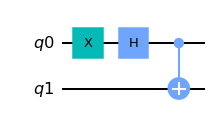

In [9]:
circ.draw(output='mpl')

**1) Faites une mesure de ce circuit pour vérifier que vous obtenez bien un état de Bell.**

*Remarque : Bien sûr, il ne s'agit pas de l'état de Bell que vous aviez déjà implémenté !*

In [ ]:
from qiskit.circuit import ClassicalRegister
from qiskit import Aer, execute

shots = 1000



job_bell = 

In [ ]:
res_bell = job_bell.result().get_counts()
print(res_bell)

In [ ]:
from math import isclose
assert isclose(res_bell['00'], shots/2, rel_tol=0.2) and isclose(res_bell['11'], shots/2, rel_tol=0.2)

### Exercice

**1) Créez maintenant un nouveau circuit** *circ2* **de taille 2 et appliquez :**

- *sur le premier qubit un objet Gate qui soit une porte NOT ;* 
- *puis sur le second qubit un objet Gate qui soit une porte d'Hadamard ;* 
- *puis un objet Gate qui soit une rotation u1 d'argument* $\pi$ *contrôlée par le premier qubit sur le second qubit ;*
- *puis sur le second qubit un objet Gate qui soit une porte d'Hadamard de nouveau ;*
- *enfin, mesurez les deux qubits. Vous nommerez le dictionnaire des résultats mesures*

In [ ]:
# from qiskit.extensions.standard.u1 import Cu1Gate
from qiskit.circuit.library.standard_gates import CPhaseGate
from math import pi

shots = 1000

circ2 = 

mesures =

In [ ]:
circ2.draw(output='mpl')

In [ ]:
assert mesures['11'] == 1000

## Nos propres objets Gate

Nous allons maintenant créer nos propres objets Gate. Pour ce faire, nous aurons deux stratégies possibles :

- convertir directement un circuit quantique en objet Gate ;
- créer de but en blanc un objet Gate à partir d'autres objets Gate.

### Conversion d'un circuit quantique en objet Gate

Grâce à la méthode *to_gate()*, il est tout à fait de convertir un circuit quantique en objet Gate. 

**1) Construisez un circuit quantique** *dummy* **sans bit classique qui reprendra vos instructions unitaires (i. e. sans les mesures) de** *circ2.*

In [ ]:
dummy = 

In [ ]:
dummy.draw(output='mpl')

Il est maintenant possible de construire un objet Gate *dummy_gate* contenant toute ces instructions unitaires :

In [ ]:
dummy_gate = dummy.to_gate()

**2) Appliquez maintenant cet objet Gate sur un nouveau circuit quantique** *circuit.*

*Remarque : vous noterez bien que la porte dummy_gate n'a plus de paramètre à mettre en entrée. Tout comme les tuples, elle n'est pas mutable.*

In [ ]:
circuit = 

In [ ]:
circuit.draw(output='mpl')

Nous pouvons constater que la visualisation est peu explicite puisqu'elle ne montre pas les composantes de l'objet Gate nouvellement créée. Voici la syntaxe pour que cette décomposition soit faite :

In [ ]:
circuit.decompose().draw(output='mpl')

**3) Faites maintenant la mesure et vérifiez que cela donne bien le même résultat que pour** *circ2.*

In [ ]:

dummy_mesures = 

In [ ]:
circuit.decompose().draw(output='mpl')

In [ ]:
assert dummy_mesures['11'] == 1000

### Création d'objets Gate

La syntaxe pour crée un objet Gate peut paraître compliquée au premier abord. En fait, il s'agit simplement d'organisation. Ces objets Gate ont des paramètres inaliénables que sont :

- le nom de l'objet Gate *name* ;
- le nombre de qubits sur lequel s'applique la porte quantique *num_qubits*.

Il est possible de rajouter d'autres paramètres, mais nous nous n'aurons pas le temps de le voir. *N'hésitez à revenir vers moi une prochaine fois si cela vous intéresse !*

Commençons par créer un objet Gate *DummyGate* qui aura :

- pour nom *Dummy Gate* ;
- pour nombre de qubits *n* sur lequel il s'applique égal à 1.

Nous ne donnerons pour le moment aucune instruction pour cette porte (il s'agit de la partie *def _define*). Autrement dit, elle agira comme la porte Identité sur un qubit :

In [11]:
from qiskit.circuit import Gate

n = 1

class DummyGate(Gate):
    """Dummy gate."""
    
    def __init__(self):
        super().__init__(name=f"Dummy Gate", num_qubits=n, params=[])  # C'est ici qu'on dit que la porte agit sur n (1) qubits !
        
    def _define(self):
        definition = []
        q = QuantumRegister(n)                       # Nous devons définir un registre quantique générique de la bonne taille
        self.definition = definition

Vérifions ce que cela donne sur un circuit quantique *(j'avoue ne pas savoir pourquoi la méthode decompose() ne fonctionne pas ici...)* :

In [ ]:
exemple_circuit = QuantumCircuit(1)

exemple_circuit.append(DummyGate(), exemple_circuit.qubits)

In [ ]:
exemple_circuit.draw(output='mpl')

Reconstruisons maintenant un objet *DummyGate* tel que :

- son nom soit toujours *Dummy Gate* ;
- il agisse toujours sur un seul qubit ;
- il applique une porte d'Hadamard.

Voici la syntaxe associée :

In [ ]:
n = 1

class DummyGate(Gate):
    """Dummy gate."""
    
    def __init__(self):
        super().__init__(name=f"Dummy Gate", num_qubits=n, params=[])
        
    def _define(self):
        q = QuantumRegister(n)  
        definition = QuantumCircuit(q)
        definition.append(HGate(), [q[0]], [])     # Voici la syntaxe pour rajouter une instruction
        self.definition = definition

**1) Redéfinissez** *exemple_circuit* **pour que ne soit appliquée que cette version de** *DummyGate.*

In [ ]:
exemple_circuit = 

*Remarque : cette fois, la méthode decompose() fonctionne.*

In [ ]:
exemple_circuit.decompose().draw(output='mpl')

**2) Définissez maintenant un objet Gate** *MonObjetGate* **tel que :**

- *son nom soit "Mon objet Gate" ;*
- *il agisse sur un seul qubit ;*
- *il applique une porte d'Hadamard puis une porte NOT ;* 

**puis redéfinissez de nouveau** *exemple_circuit* **pour appliquer cette porte.**

In [ ]:
class MonObjetGate(Gate):
    """Mon objet gate."""
    


In [ ]:
exemple_circuit = 

In [ ]:
exemple_circuit.decompose().draw(output='mpl')

Pour ne pas trop allonger la taille de ce Jupyter Notebook (qui sera déjà suffisamment long), voici un exemple d'objet Gate nommé *PorteBell* dont vous reconnaîtrez l'action et qui permet d'illustrer le cas où *num_qubits* = 2 :)

In [12]:
n = 2

class PorteBell(Gate):
    """Porte Bell."""
    
    def __init__(self):
        super().__init__(name=f"Porte Bell", num_qubits=n, params=[])  
        
    def _define(self):
        q = QuantumRegister(n)
        definition = QuantumCircuit(q)
        definition.append(HGate(), [q[0]], [])
        definition.append(CXGate(), q, [])
        self.definition = definition

In [13]:
exemple_circuit = QuantumCircuit(2)

exemple_circuit.append(PorteBell(), exemple_circuit.qubits)

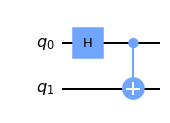

In [14]:
exemple_circuit.decompose().draw(output='mpl')

Nous allons maintenant créer une porte telle que le nombre de qubits soit un **paramètre à donner**. Redéfinissons la porte *DummyGate* pour cela telle qu'elle fasse agir une porte XGate sur les qubits d'indices pairs et une porte HGate sur les qubits d'indices impairs  :

In [15]:
class DummyGate(Gate):
    """Dummy gate."""
    
    def __init__(self, num_qubits):
        self.num_qubits = num_qubits # Cette variable interne doit être définie pour qu'elle soit prise en compte dans la méthode _define                      
        super().__init__(name=f"Dummy Gate", num_qubits=num_qubits, params=[]) 
        
    def _define(self):
        q = QuantumRegister(self.num_qubits)
        definition = QuantumCircuit(q)
        for i in range(self.num_qubits):
            if i % 2 == 0 :
                definition.append(XGate(), [q[i]], [])
            else :
                definition.append(HGate(), [q[i]], [])
        self.definition = definition

In [16]:
n = 4

exemple_circuit = QuantumCircuit(n)

exemple_circuit.append(DummyGate(n), exemple_circuit.qubits)

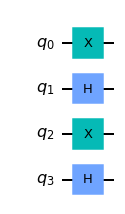

In [17]:
exemple_circuit.decompose().draw(output='mpl')

Nous pratiquons tout ceci lors de la prochaine partie.

## Gain de modularité

Avant de vraiment prendre la main sur les objets Gate, il s'agit de répondre à ces questions : *pourquoi les utiliser ? N'est-ce pas simplement se compliquer la vie ?*

La réponse à cette dernière question est évidemment non, et ce pour plusieurs raisons :

- si nous souhaitons contrôler un circuit quantique, il faut en fait en reconstruire un au complet ce qui n'est pas le cas pour les objets Gate ;
- il est facile d'inverser un objet Gate ;
- les méthodes impliquant des objets Gate sont en conséquence bien plus modulables.

Nous prendrons dans cette partie deux exemples :

- la méthode *do_swaps* contrôlée ;
- la méthode *QFT* contrôlée.

### La méthode *do_swaps* contrôlée

Nous nous souvenons de notre méthode *do_swaps* :

In [18]:
def porte_SWAP(circuit, qubits):
    
    if type(circuit) == QuantumCircuit:
        
        if len(qubits) == 2:
            circuit.cx(qubits[0], qubits[1])
            circuit.cx(qubits[1], qubits[0])    
            circuit.cx(qubits[0], qubits[1])
               
    return circuit


def do_swaps(circuit, registre):
    for i in range(len(registre) // 2) :
        circuit = porte_SWAP(circuit, [registre[i], registre[len(registre) - 1 - i]])
    return circuit

Avant de construire sa version contrôlée, nous construirons l'équivalent de *do_swaps* en objet Gate que nous nommerons DoSwaps.

**1) Construisez un objet Gate** *PorteSwap* **qui agisse sur deux qubits et qui fasse un SWAP.**

In [ ]:
class PorteSwap(Gate):
    """SWAP gate."""
    
    

In [ ]:
exemple_circuit = QuantumCircuit(2)

exemple_circuit.append(PorteSwap(), exemple_circuit.qubits)

In [ ]:
exemple_circuit.decompose().draw(output='mpl')

**2) Construisez maintenant l'objet Gate** *DoSwaps* **qui prendra en paramètre le nombre de qubits.**

In [ ]:
class DoSwaps(Gate):
    """Do swaps gate."""
    
    

In [ ]:
n = 5

exemple_circuit = QuantumCircuit(n)

exemple_circuit.append(DoSwaps(n), exemple_circuit.qubits)

In [ ]:
exemple_circuit.decompose().decompose().draw(output='mpl')

Nous pouvons maintenant passer à la version simple contrôlée de *do_swaps*. Pour construire sa version contrôlée, nous aurons besoin d'utiliser la méthode *QuantumCircuit.ccx*, autrement appelée porte de Toffoli qui s'appliquer de cette manière :

In [ ]:
exemple_circuit = QuantumCircuit(3)
exemple_q = exemple_circuit.qubits
exemple_circuit.ccx(exemple_q[0], exemple_q[1], exemple_q[2])

In [ ]:
exemple_circuit.draw(output='mpl')

**3) Construisez une méthode** *c_porte_SWAP* **qui soit une porte SWAP simplement contrôlée.**

In [ ]:
def c_porte_SWAP(circuit, ctrl_qubit, qubits):
    
    

In [ ]:
exemple_circuit = QuantumCircuit(3)
ctrl_qubit = exemple_circuit.qubits[0]
exemple_circuit = c_porte_SWAP(exemple_circuit, ctrl_qubit, exemple_circuit.qubits[1:])

In [ ]:
exemple_circuit.draw(output='mpl')

**4) Construisez maintenant une méthode** *c_do_swaps* **qui soit la méthode** *do_swaps* **simplement contrôlée.**

In [ ]:
def c_do_swaps(circuit, ctrl_qubit, registre):
    
    

In [ ]:
n = 5

exemple_circuit = QuantumCircuit(n)
ctrl_qubit = exemple_circuit.qubits[0]

exemple_circuit = c_do_swaps(exemple_circuit, ctrl_qubit, exemple_circuit.qubits[1:])

In [ ]:
exemple_circuit.draw(output='mpl')

Nous allons voir maintenant ensemble comment contrôler l'objet Gate *DoSwaps*. Comme vous vous doutez, cela sera très facile, et ce grâce à la méthode *Gate.control()* :

In [ ]:
num_ctrl_qubits = 1 # Il s'agit du nb de qubits qui contrôlent la porte

class CDoSwaps(Gate):
    """Controlled do swaps gate."""
    
    def __init__(self, num_qubits):
        self.num_qubits = num_qubits
        super().__init__(name=f"Controlled Do Swaps Gate", num_qubits=num_qubits, params=[]) 
        
    def _define(self):
        q = QuantumRegister(self.num_qubits)
        definition = QuantumCircuit(q)
        definition.append(DoSwaps(self.num_qubits - num_ctrl_qubits).control(num_ctrl_qubits), q, []) # C'est ici que ça se passe !
        self.definition = definition

In [ ]:
n = 5

exemple_circuit = QuantumCircuit(n)

exemple_circuit.append(CDoSwaps(n), exemple_circuit.qubits)

In [ ]:
exemple_circuit.decompose().draw(output='mpl')

In [ ]:
exemple_circuit.decompose().decompose().draw(output='mpl')

Comme nous pouvons le constater, dès le moment que l'objet Gate est créé, il est très simple de le contrôler, et ce par un ou même plusieurs qubits. Si nous voulions généraliser une méthode *mc_do_swaps* avec un nombre de qubits de contrôle supérieur à 1, il faudrait réécrire la méthode au complet en utilisant la méthode *QuantumCircuit.mct* ! Cela peut être un bon entraînement, je vous encourage à le faire dans votre temps libre (quand vous en aurez l'envie bien sûr).

Merci d'avoir participé à ce cours et j'espère qu'il vous aura plu ! N'hésitez pas à me donner des commentaires sur le feedback que je vous transmetterai à la fin de la séance.

Merci encore pour votre attention, en vous souhaitant bon courage pour les derniers mois avant le diplôme !